# Determining appropriate steps/stepsizes for integrals

In this notebook we try to identify the "best" stepsize for a variety of known Hankel-type integrals (found in tests). This may help with choosing stepsizes for unknown functions that look similar to some of these.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
from hankel import HankelTransform

from scipy.special import k0,gamma

In [4]:
hgrid = np.logspace(-4,0,50)
Ngrid = np.arange(50,1050,50)

In [72]:
def imshow_plots(res,errs):
    plt.imshow(np.abs(res.T),origin="lower",aspect="auto",cmap='viridis',extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]],
               norm = colors.LogNorm())

    
    plt.xlabel(r"$\log_{10} h$")
    plt.ylabel(r"$N$")
    plt.colorbar()
    plt.contour(np.abs(res.T), [1e-5,1e-3,1e-2],
             origin='lower',
             linewidths=2,
             extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]],aspect="auto")
    #plt.xscale('log')
    plt.show()
    plt.imshow(np.abs(errs.T),origin="lower",aspect="auto",cmap='viridis',extent=[hgrid[0],hgrid[-1],Ngrid[0],Ngrid[-1]],
               norm = colors.LogNorm())
    plt.xscale('log')
    plt.xlabel(r"$h$")
    plt.ylabel(r"$N$")
    plt.colorbar()
    plt.show()
    
def analyse(f,anl,nu=0):
    res = np.zeros((len(hgrid),len(Ngrid)))
    errs = np.zeros((len(hgrid),len(Ngrid)))
    for ih,h in enumerate(hgrid):
        for iN, N in enumerate(Ngrid):
            ht = HankelTransform(nu=nu, N=N, h=h)
            ans, errs[ih,iN] = ht.integrate(f)
            res[ih,iN] = ans/anl -1
            errs /= anl
    return res,errs

## Unity

In [53]:
f = lambda x : 1
anl = 1

res,errs = analyse(f,anl)

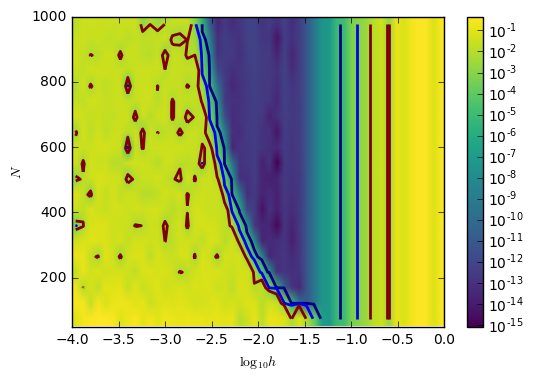

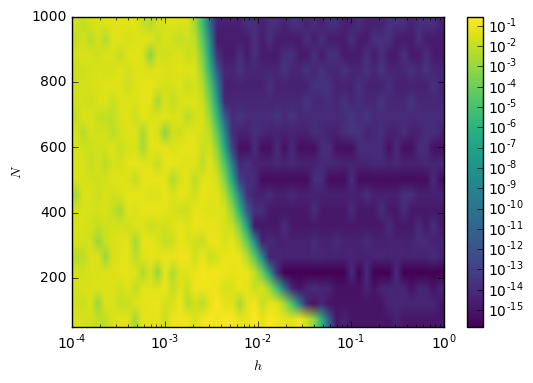

In [56]:
imshow_plots(res,errs)

## x/(x^2 + 1)

/home/steven/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: overflow encountered in divide


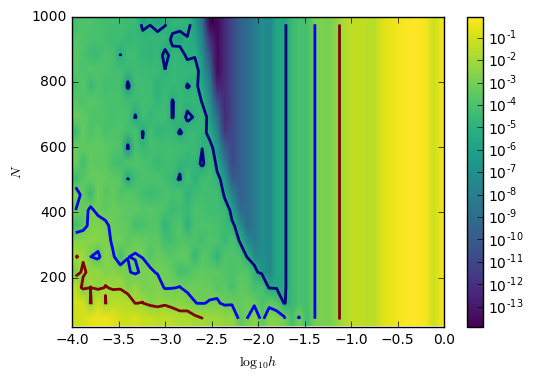

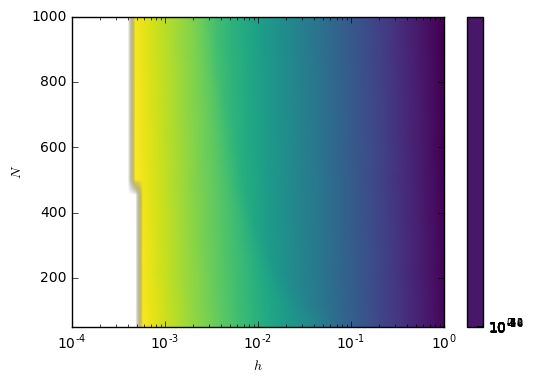

In [57]:
f = lambda x : x/(x**2+1)
anl = k0(1)

res,errs = analyse(f,anl)
imshow_plots(res,errs)

## x^2

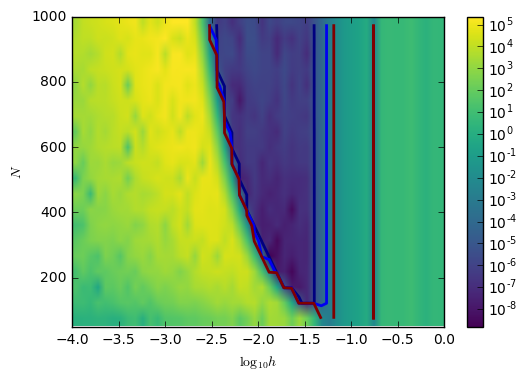

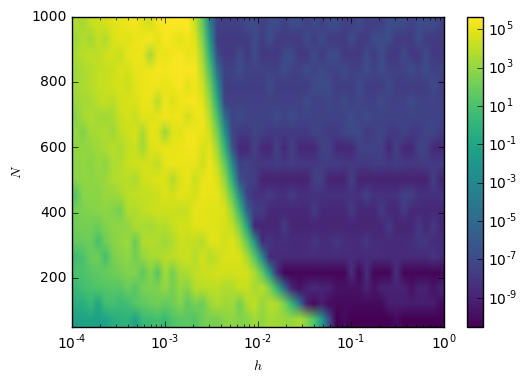

In [58]:
f = lambda x : x**2
anl = -1

res,errs = analyse(f,anl)
imshow_plots(res,errs)

## x^4

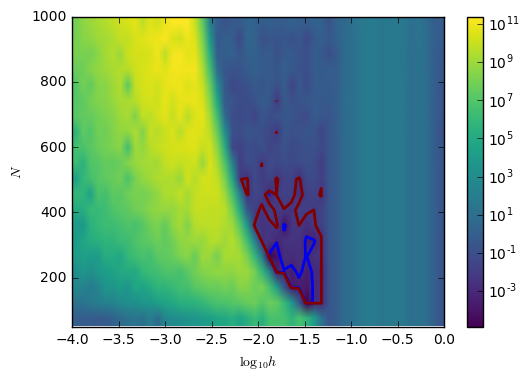

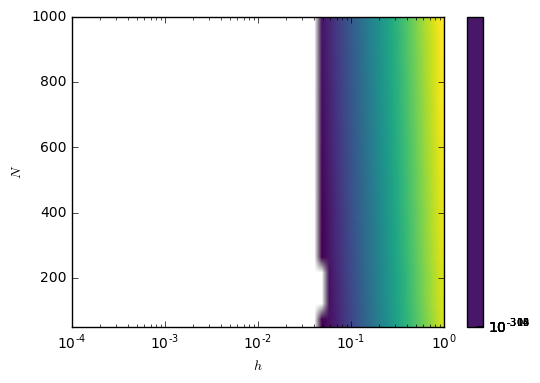

In [59]:
f = lambda x : x**4
anl = 9

res,errs = analyse(f,anl)
imshow_plots(res,errs)

## 1/sqrt(x)

This seems weird that it doesn't work...

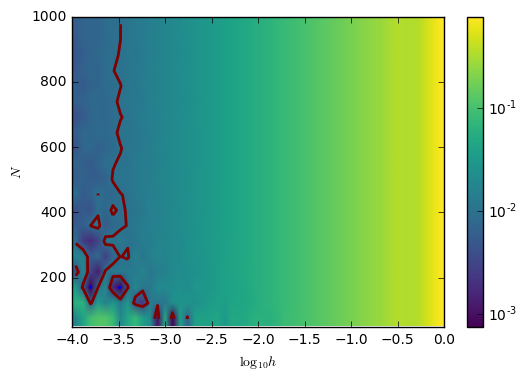

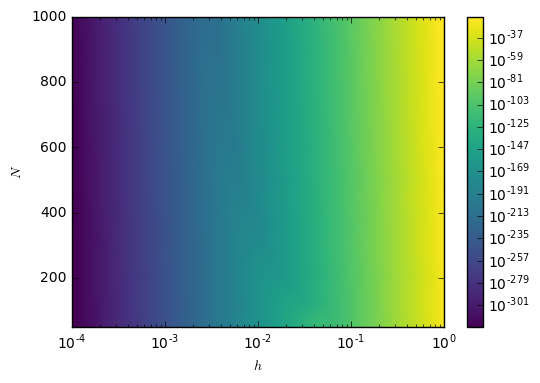

In [61]:
f = lambda x : 1./np.sqrt(x)
m = -1.5
anl = 2**(m+1)*gamma(m/2+1)/gamma(-m/2)

res,errs = analyse(f,anl)
imshow_plots(res,errs)

## x/(x^2+z^2)

/home/steven/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: overflow encountered in divide


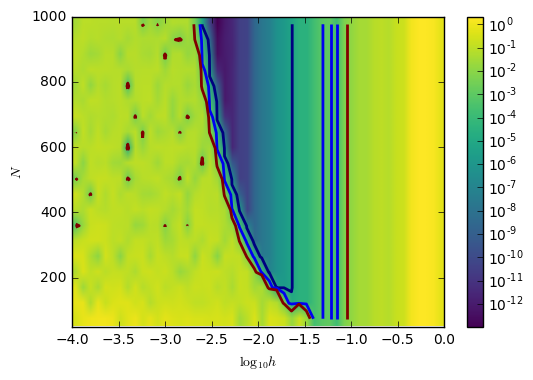

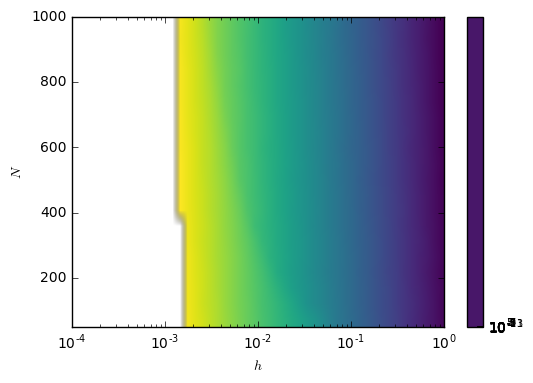

In [64]:
z = 1
f = lambda x : x/np.sqrt(x**2 + z**2)
anl = np.exp(-z)

res,errs = analyse(f,anl)
imshow_plots(res,errs)

/home/steven/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: overflow encountered in divide


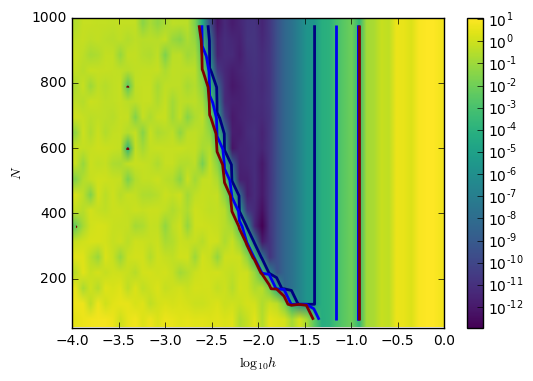

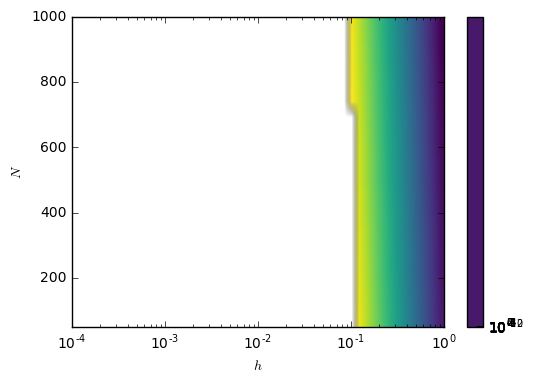

In [65]:
z = 3
f = lambda x : x/np.sqrt(x**2 + z**2)
anl = np.exp(-z)

res,errs = analyse(f,anl)
imshow_plots(res,errs)

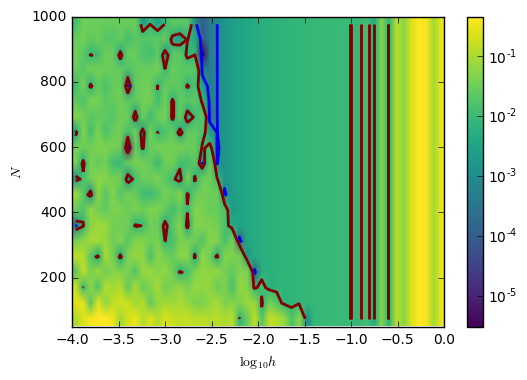

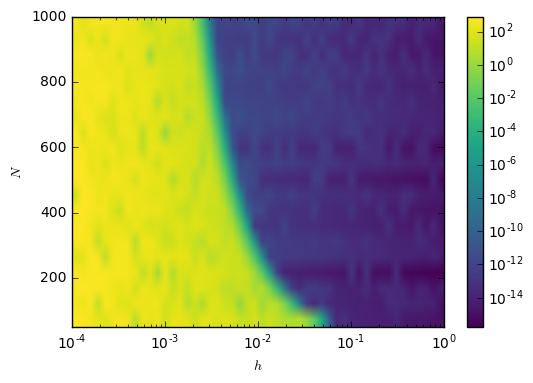

In [66]:
z = 0.01
f = lambda x : x/np.sqrt(x**2 + z**2)
anl = np.exp(-z)

res,errs = analyse(f,anl)
imshow_plots(res,errs)

## Gaussian

This looks messy, and definitely it's a good idea to keep $h>10^{-2.5}$, but really there's a huge range of easiness.

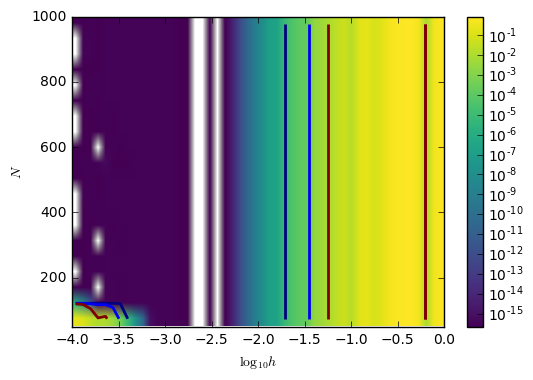

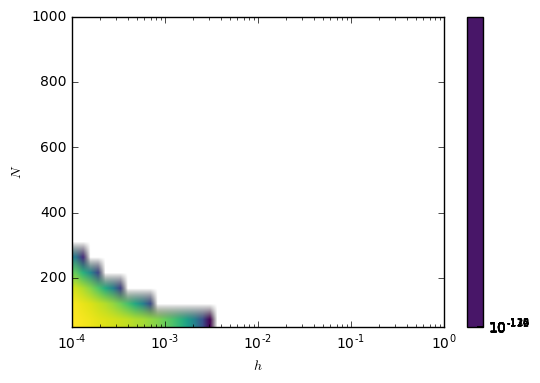

In [67]:
z = 1
f = lambda x : x*np.exp(-0.5*z**2*x**2)
anl = 1./z**2 * np.exp(-0.5/z**2)

res,errs = analyse(f,anl)
imshow_plots(res,errs)

## Power Laws

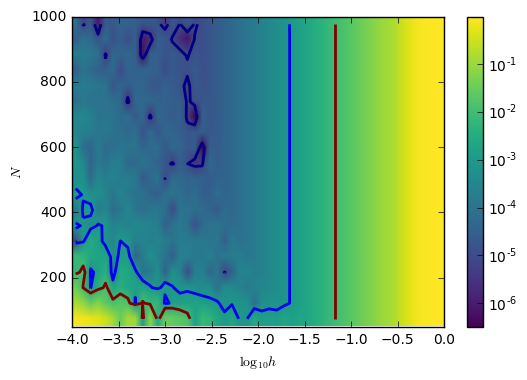

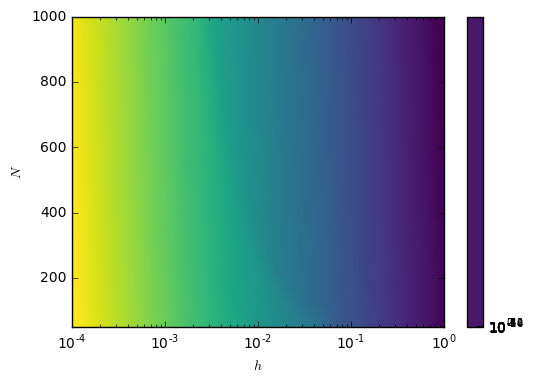

In [73]:
s = -2
nu = 2
f = lambda x : x**(s+1)
anl = 2**(s+1)*gamma(0.5*(2+nu+s))/gamma(0.5*(nu-s))

res,errs = analyse(f,anl,nu)
imshow_plots(res,errs)

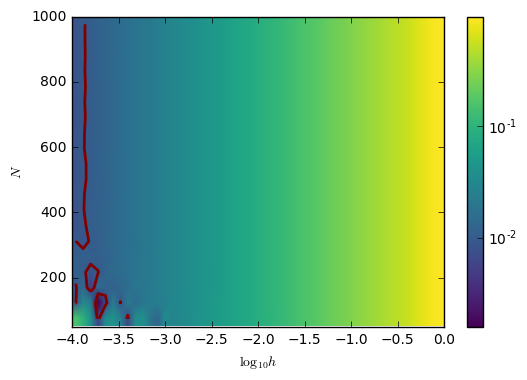

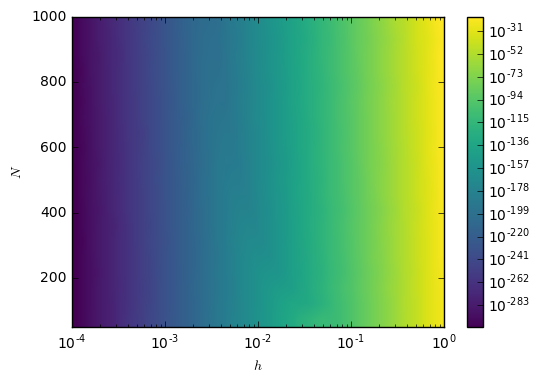

In [74]:
s = -2
nu = 0.5
f = lambda x : x**(s+1)
anl = 2**(s+1)*gamma(0.5*(2+nu+s))/gamma(0.5*(nu-s))

res,errs = analyse(f,anl,nu)
imshow_plots(res,errs)

In [77]:
gamma(0)

inf